In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
train = pd.read_csv("/content/drive/MyDrive/Forcast_Green_Energy/train_IxoE5JN.csv")
test = pd.read_csv("/content/drive/MyDrive/Forcast_Green_Energy/test_WudNWDM.csv")
sample_sub = pd.read_csv("/content/drive/MyDrive/Forcast_Green_Energy/sample_submission_jn0a7vR.csv")

train.shape, test.shape, sample_sub.shape

((94992, 3), (26304, 2), (26304, 2))

In [5]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['datetime'].dt.date.value_counts()#.sort_index()

2008-03-01    24
2015-05-13    24
2015-05-15    24
2015-05-16    24
2015-05-17    24
              ..
2011-10-15    24
2011-10-16    24
2011-10-17    24
2011-10-18    24
2018-12-31    24
Name: datetime, Length: 3958, dtype: int64

In [6]:
test['datetime'] = pd.to_datetime(test['datetime'])
test['datetime'].dt.date.value_counts().sort_index()

2019-01-01    24
2019-01-02    24
2019-01-03    24
2019-01-04    24
2019-01-05    24
              ..
2021-12-27    24
2021-12-28    24
2021-12-29    24
2021-12-30    24
2021-12-31    24
Name: datetime, Length: 1096, dtype: int64

# EDA

## Complete TS

<Axes: xlabel='datetime'>

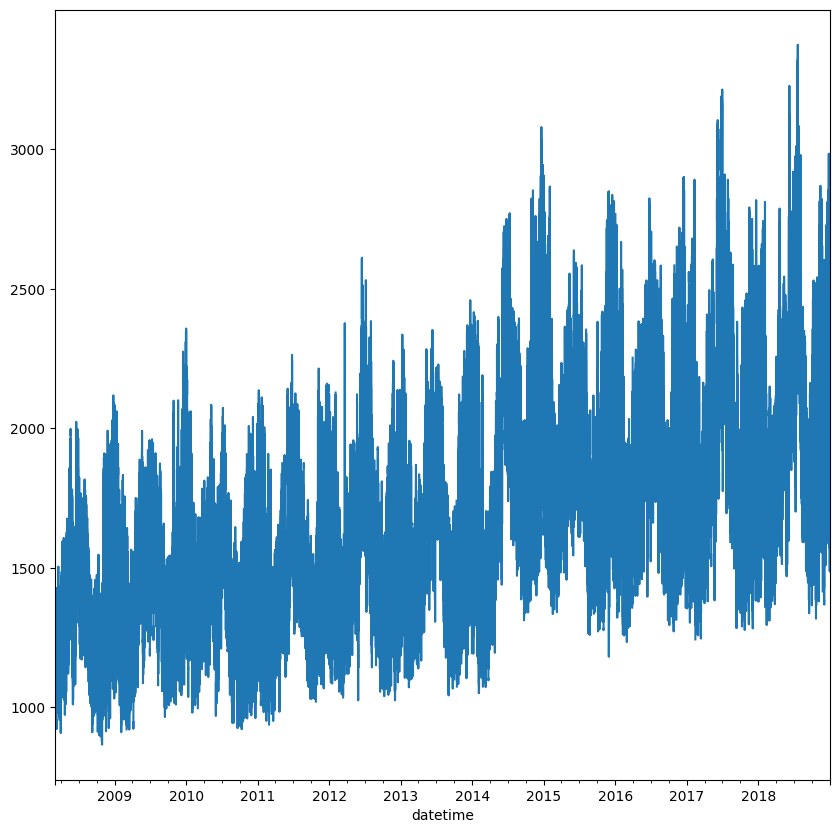

In [7]:
train[['datetime','energy']].set_index('datetime')['energy'].plot(figsize=(10,10))

<Axes: xlabel='datetime'>

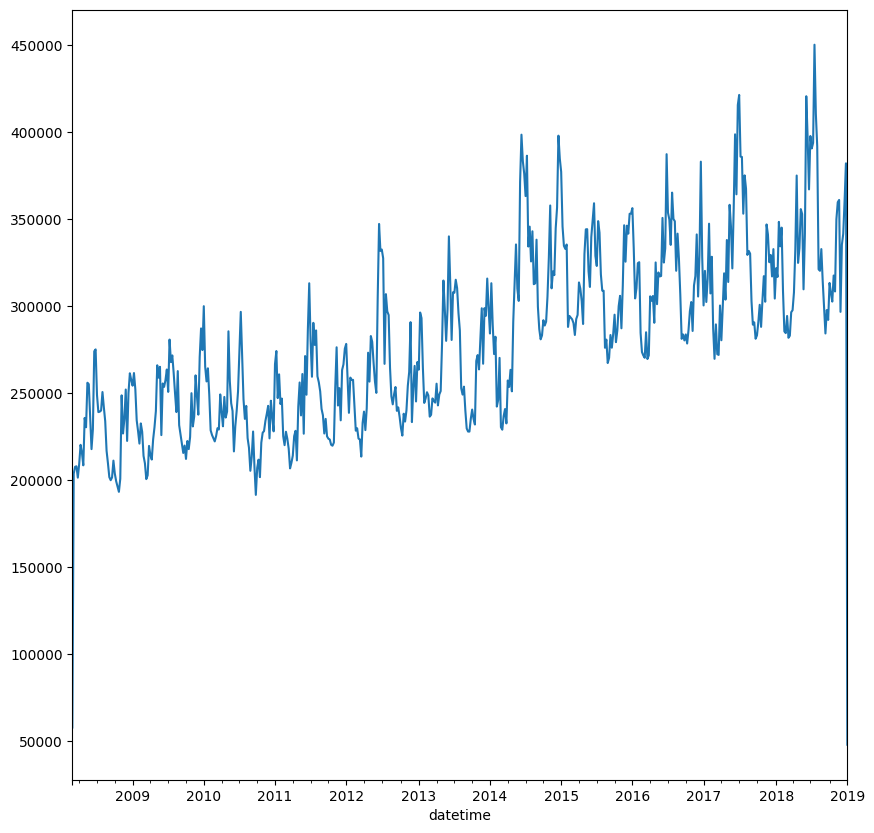

In [8]:
train[['datetime','energy']].set_index('datetime')['energy'].resample('W').sum().plot(figsize=(10,10))

## YoY Daily

In [9]:
train['doy_h'] = train['datetime'].dt.dayofyear.astype(str).str.zfill(3) + '|' + train['datetime'].dt.hour.astype(str).str.zfill(2)
train['year'] = train['datetime'].dt.year
train.head()

,row_id,datetime,energy,doy_h,year
0,1,2008-03-01 00:00:00,1259.985563,061|00,2008
1,2,2008-03-01 01:00:00,1095.541500,061|01,2008
2,3,2008-03-01 02:00:00,1056.247500,061|02,2008
3,4,2008-03-01 03:00:00,1034.742000,061|03,2008
4,5,2008-03-01 04:00:00,1026.334500,061|04,2008


<Axes: xlabel='doy_h'>

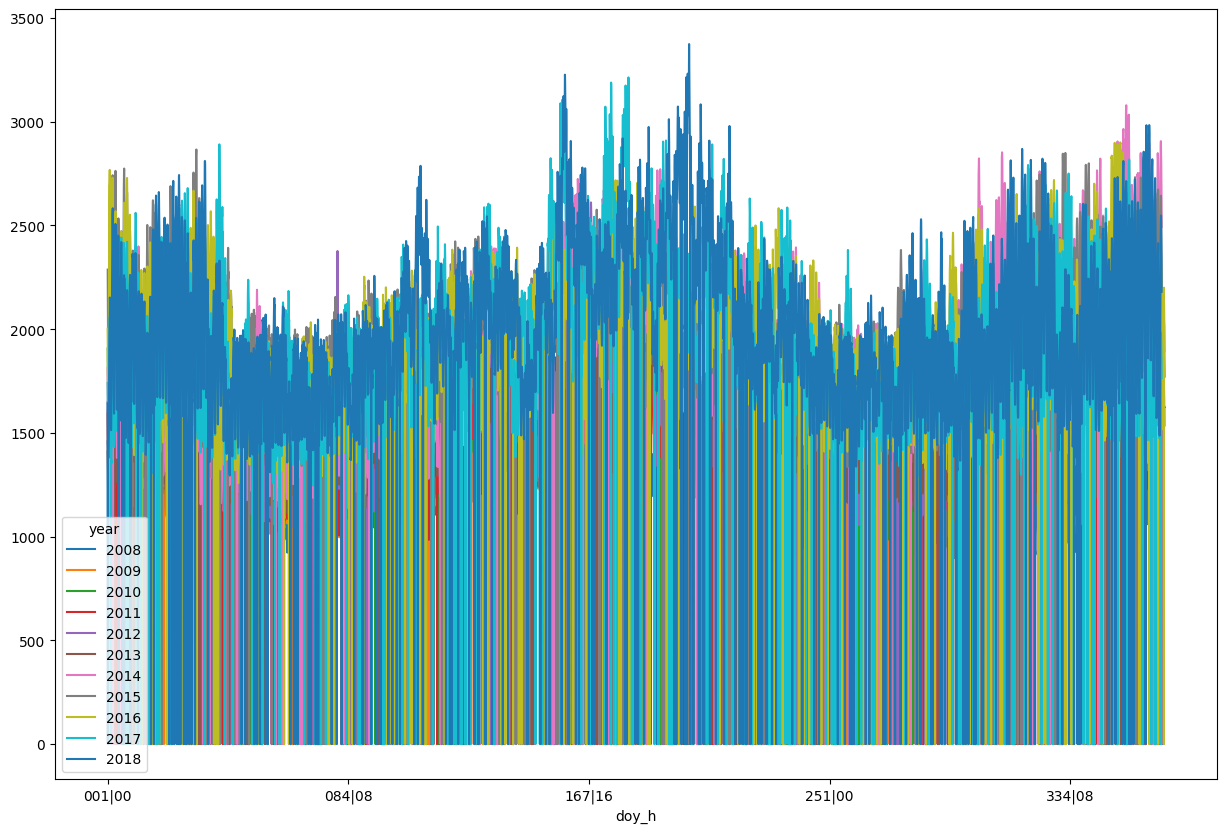

In [10]:
yoy = train.groupby(['doy_h','year'])['energy'].sum().unstack()
yoy.plot(figsize=(15,10))

<Axes: xlabel='doy_h'>

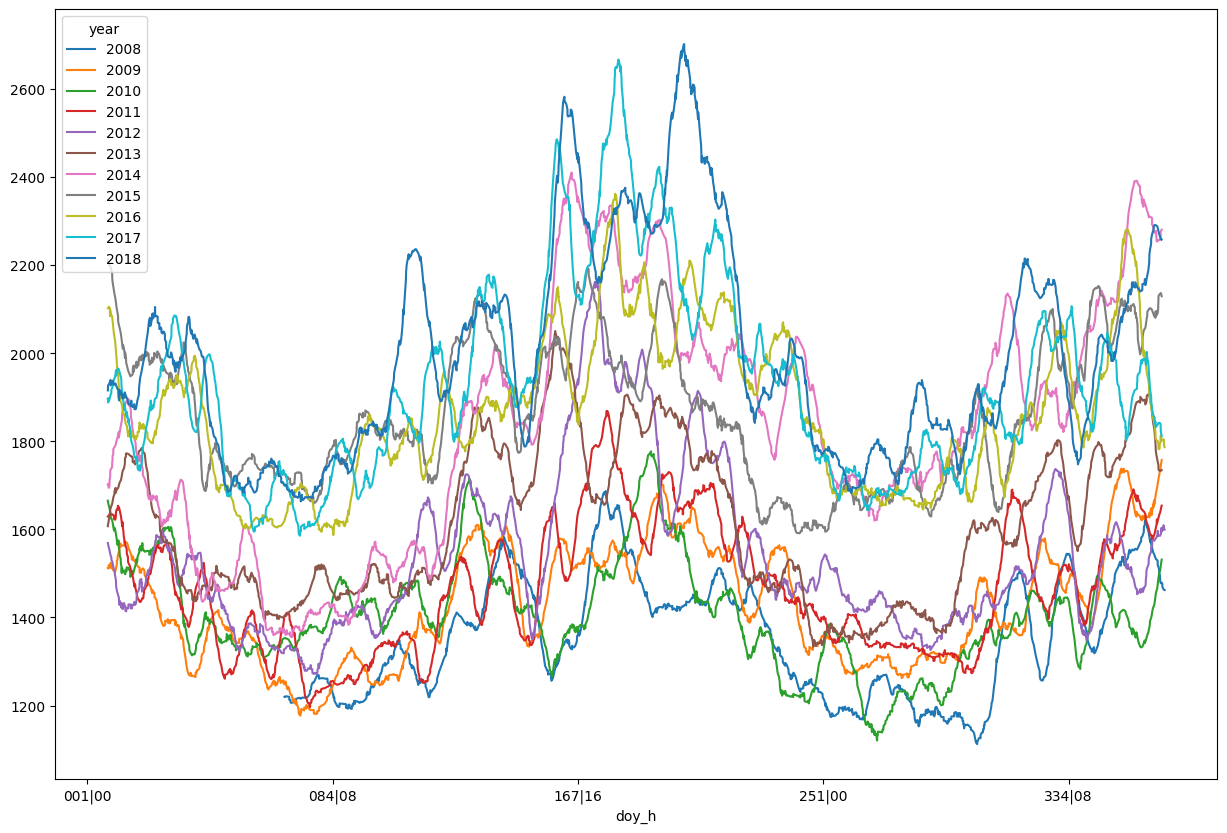

In [11]:
yoy.rolling(24*7).mean().loc[:,:].plot(figsize=(15,10))

## YoY DoM

In [12]:
8//7

1

<Axes: xlabel='dom'>

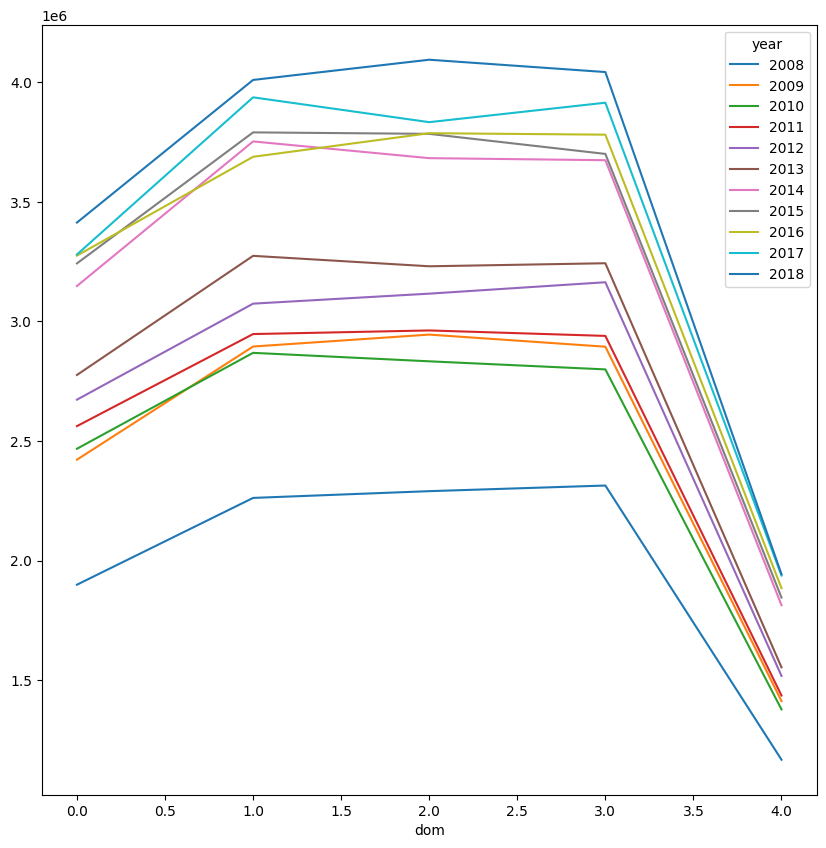

In [13]:
train['dom'] = train['datetime'].dt.day//7

train.groupby(['dom','year'])['energy'].sum().unstack().plot(figsize=(10,10))

## YoY DoW

In [14]:
train['dow'] = train['datetime'].dt.dayofweek

<Axes: xlabel='dow'>

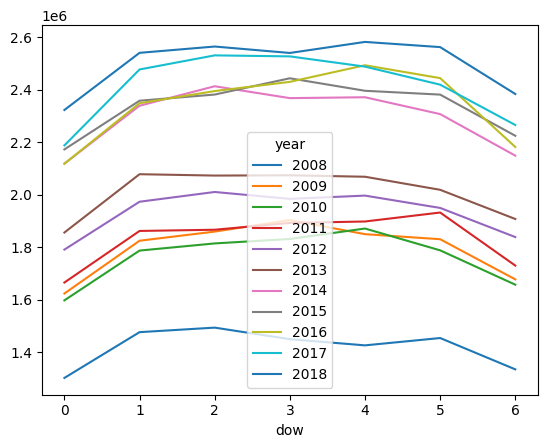

In [15]:
train.groupby(['dow','year'])['energy'].sum().unstack().plot()

## YoY MoY

<Axes: xlabel='month'>

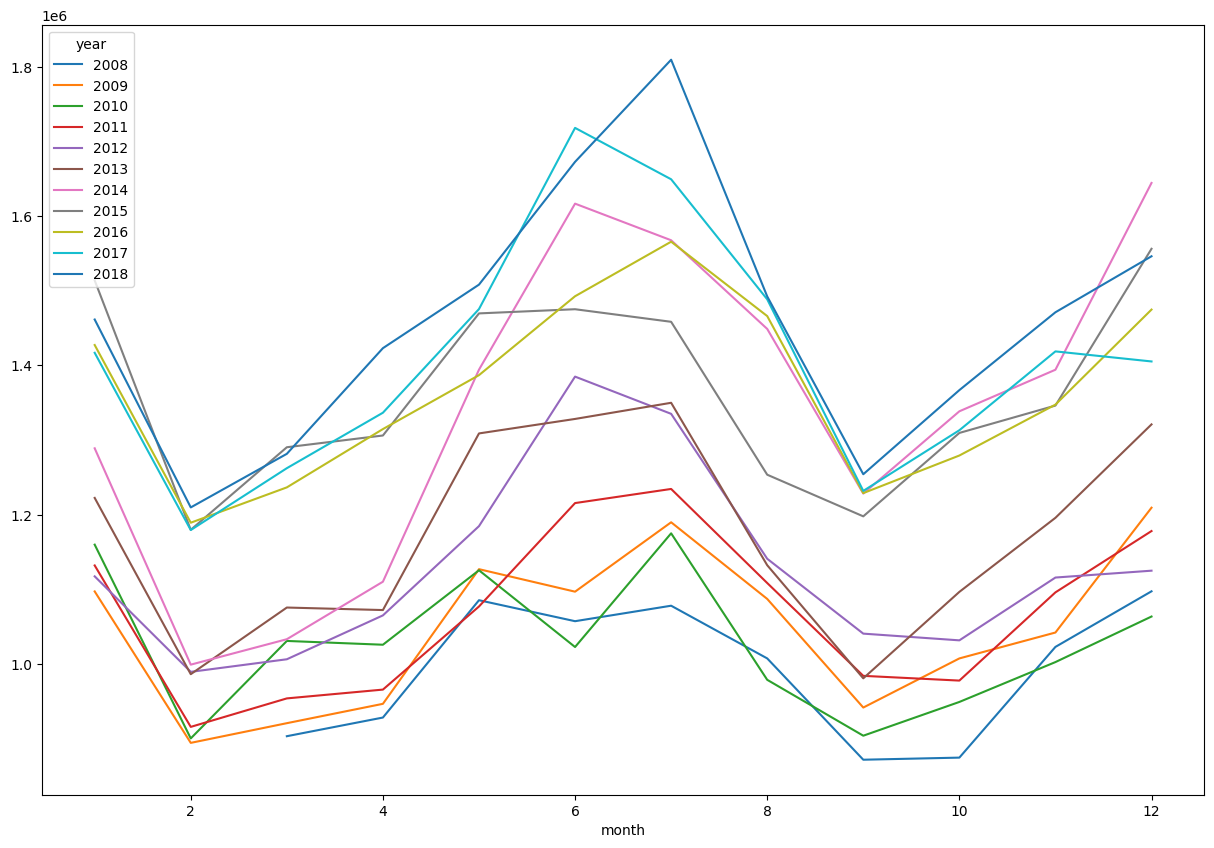

In [16]:
train['month'] = train['datetime'].dt.month
yoy = train.groupby(['month','year'])['energy'].sum().unstack()
yoy.plot(figsize=(15,10))

In [17]:
train.groupby(['month','year'])['energy'].sum().unstack()

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
month,,,,,,,,,,,
1,NaN,1.097660e+06,1.160245e+06,1.132423e+06,1.117823e+06,1.222795e+06,1.289157e+06,1.513836e+06,1.427396e+06,1.416982e+06,1.461525e+06
2,NaN,8.950083e+05,9.009759e+05,9.163941e+05,9.900306e+05,9.869065e+05,9.996684e+05,1.180119e+06,1.189606e+06,1.179799e+06,1.210071e+06
3,9.039156e+05,9.213476e+05,1.031392e+06,9.545074e+05,1.006875e+06,1.076096e+06,1.033698e+06,1.290583e+06,1.236880e+06,1.262562e+06,1.281786e+06
4,9.288909e+05,9.472536e+05,1.026329e+06,9.662874e+05,1.065587e+06,1.072724e+06,1.110661e+06,1.306311e+06,1.314904e+06,1.336786e+06,1.423164e+06
5,1.085890e+06,1.127434e+06,1.125962e+06,1.077491e+06,1.185006e+06,1.309080e+06,1.394385e+06,1.469697e+06,1.387060e+06,1.475493e+06,1.508187e+06
6,1.057816e+06,1.097324e+06,1.023275e+06,1.215882e+06,1.385104e+06,1.328461e+06,1.616558e+06,1.475280e+06,1.492652e+06,1.717932e+06,1.672476e+06
7,1.078533e+06,1.190189e+06,1.175417e+06,1.234778e+06,1.335297e+06,1.350075e+06,1.567566e+06,1.458446e+06,1.565644e+06,1.649171e+06,1.809148e+06
8,1.008029e+06,1.087627e+06,9.793890e+05,1.108908e+06,1.141360e+06,1.132738e+06,1.448933e+06,1.253849e+06,1.466118e+06,1.488550e+06,1.492413e+06
9,8.724509e+05,9.422665e+05,9.045873e+05,9.846841e+05,1.041174e+06,9.813673e+05,1.228592e+06,1.198125e+06,1.229217e+06,1.232157e+06,1.254471e+06


## YoY Quarterly

<Axes: xlabel='quarter'>

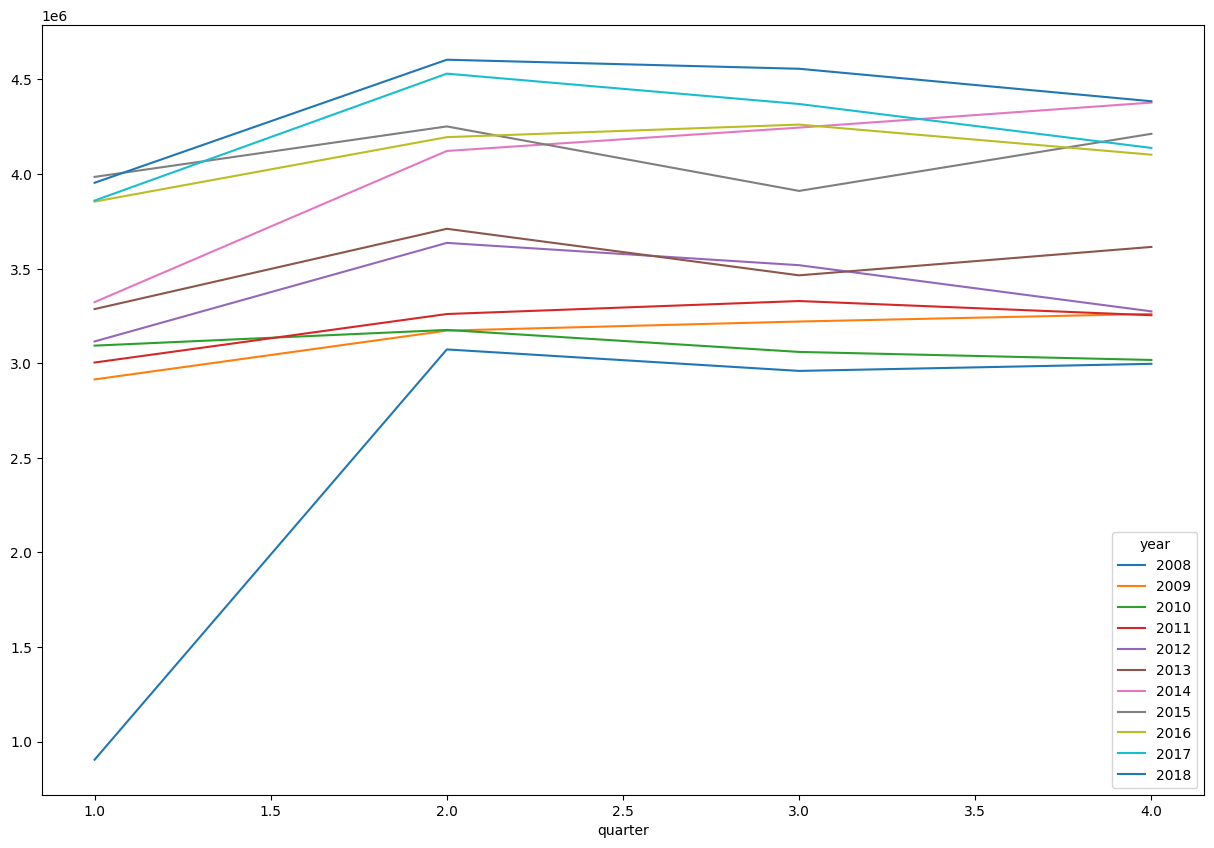

In [18]:
train['quarter'] = train['datetime'].dt.quarter
yoy = train.groupby(['quarter','year'])['energy'].sum().unstack()
yoy.plot(figsize=(15,10))

## YoY Hourly

In [19]:
train['hour'] = train['datetime'].dt.hour

<Axes: xlabel='hour'>

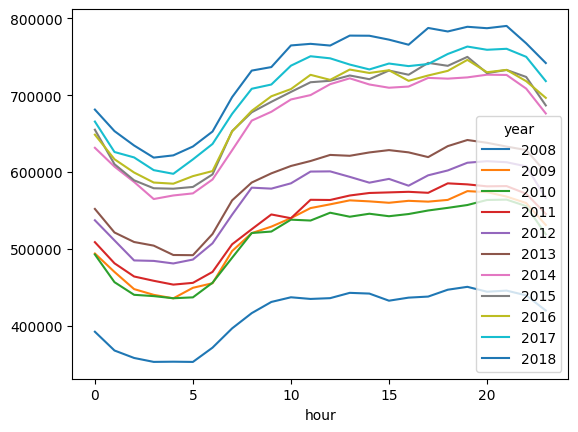

In [20]:
train.groupby(['hour','year'])['energy'].sum().unstack().plot()

In [21]:
train['date'] = train['datetime'].dt.date

In [22]:
train['daily_energy'] = train['date'].map(train.groupby('date')['energy'].sum())
train['dth_ratio'] = train['energy']/train['daily_energy']
train

,row_id,datetime,energy,doy_h,year,dom,dow,month,quarter,hour,date,daily_energy,dth_ratio
0,1,2008-03-01 00:00:00,1259.985563,061|00,2008,0,5,3,1,0,2008-03-01,30336.129562,0.041534
1,2,2008-03-01 01:00:00,1095.541500,061|01,2008,0,5,3,1,1,2008-03-01,30336.129562,0.036113
2,3,2008-03-01 02:00:00,1056.247500,061|02,2008,0,5,3,1,2,2008-03-01,30336.129562,0.034818
3,4,2008-03-01 03:00:00,1034.742000,061|03,2008,0,5,3,1,3,2008-03-01,30336.129562,0.034109
4,5,2008-03-01 04:00:00,1026.334500,061|04,2008,0,5,3,1,4,2008-03-01,30336.129562,0.033832
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94987,94988,2018-12-31 19:00:00,2528.446800,365|19,2018,4,0,12,4,19,2018-12-31,48053.720000,0.052617
94988,94989,2018-12-31 20:00:00,2461.883600,365|20,2018,4,0,12,4,20,2018-12-31,48053.720000,0.051232
94989,94990,2018-12-31 21:00:00,2365.994400,365|21,2018,4,0,12,4,21,2018-12-31,48053.720000,0.049236
94990,94991,2018-12-31 22:00:00,2342.942800,365|22,2018,4,0,12,4,22,2018-12-31,48053.720000,0.048757


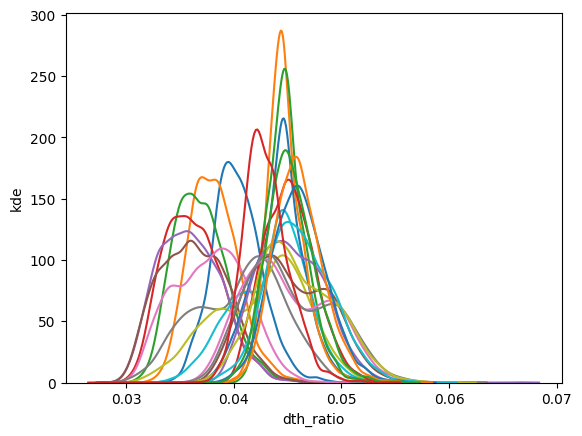

In [23]:
train.groupby('hour')['dth_ratio'].apply(lambda x: sns.kdeplot(x, label = x.name))
plt.xlabel('dth_ratio')
plt.ylabel('kde')
plt.show()

In [24]:
yoy_dth_dist = train.groupby(['year','hour'])['dth_ratio'].describe().reset_index()
yoy_dth_dist['coef_var'] = yoy_dth_dist['std']/yoy_dth_dist['mean']
yoy_dth_dist.groupby(['year'])['coef_var'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2008,24.0,0.064361,0.017022,0.035390,0.049644,0.064569,0.076821,0.098139
2009,24.0,0.065620,0.018342,0.036302,0.050657,0.063868,0.078985,0.100359
2010,24.0,0.067425,0.017620,0.039645,0.052349,0.065701,0.081755,0.100075
2011,24.0,0.065747,0.017668,0.035481,0.050266,0.064628,0.078057,0.095903
2012,24.0,0.068817,0.016689,0.040046,0.053678,0.070866,0.081393,0.096795
2013,24.0,0.067397,0.019802,0.039533,0.051481,0.065224,0.081843,0.104841
2014,24.0,0.069852,0.018967,0.039954,0.055540,0.070891,0.084631,0.101999
2015,24.0,0.069593,0.018160,0.041907,0.055314,0.068112,0.082100,0.103912
2016,24.0,0.068186,0.018160,0.035628,0.052541,0.068182,0.082813,0.097428


In [25]:
train.groupby(['year','hour'])['dth_ratio'].mean().unstack().std()

hour
0     0.000102
1     0.000114
2     0.000160
3     0.000179
4     0.000225
5     0.000249
6     0.000253
7     0.000206
8     0.000233
9     0.000224
10    0.000216
11    0.000135
12    0.000095
13    0.000090
14    0.000149
15    0.000232
16    0.000248
17    0.000249
18    0.000193
19    0.000137
20    0.000128
21    0.000107
22    0.000199
23    0.000160
dtype: float64

# Validation Set Creation

## Datetime Level

In [26]:
test['datetime'].dt.year.value_counts()

2020    8784
2019    8760
2021    8760
Name: datetime, dtype: int64

In [27]:
train_ts = train[train['year']<=2015][['datetime','energy']].rename(columns = {'datetime':"ds",'energy':'y'}).sort_values('ds')
val_ts = train[train['year']>2015][['datetime','energy']].rename(columns = {'datetime':"ds",'energy':'y'}).sort_values('ds')

In [28]:

train_ts['y'].fillna(train_ts['y'].rolling(6).mean(),inplace=True)

In [29]:
final_train = train[['datetime','energy']].rename(columns = {'datetime':"ds",'energy':'y'}).sort_values('ds')
final_train['y'].fillna(final_train['y'].rolling(6).mean(), inplace=True)
final_future = test['datetime'].to_frame().rename(columns = {'datetime':'ds'})

## Date Level

<Axes: xlabel='date'>

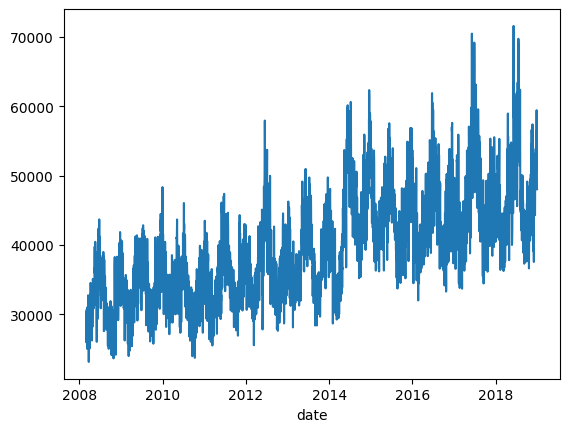

In [30]:
train['date'] = train['datetime'].dt.date
train.groupby('date')['energy'].sum().plot()

In [31]:
train_ts = train[train['year']<=2015].groupby('date')['energy'].sum().reset_index().rename(columns = {'date':'ds','energy':"y"})
val_ts = train[train['year']>2015].groupby('date')['energy'].sum().reset_index().rename(columns = {'date':'ds','energy':"y"})

In [32]:
final_train = train.groupby('date')['energy'].sum().reset_index().rename(columns = {'date':'ds','energy':"y"})

final_future = pd.DataFrame({'ds':test['datetime'].dt.date.unique()}).sort_values('ds')
final_future

,ds
0,2019-01-01
1,2019-01-02
2,2019-01-03
3,2019-01-04
4,2019-01-05
...,...
1091,2021-12-27
1092,2021-12-28
1093,2021-12-29
1094,2021-12-30


# Prophet Exploration

In [37]:
from prophet import Prophet
from prophet.plot import plot_plotly

#from neuralprophet import NeuralProphet

In [38]:
# help(Prophet)
# help(cross_validation)

In [39]:
train[train.energy.isnull()]['month'].value_counts()#.plot()

1     185
8     178
10    173
6     165
7     162
9     161
5     157
12    157
4     154
3     151
11    149
2     108
Name: month, dtype: int64

In [40]:
model = Prophet(yearly_seasonality=25, weekly_seasonality=True, daily_seasonality=True,  changepoint_range=0.9)#,  seasonality_prior_scale=0.05)#,seasonality_prior_scale=15)#,seasonality_mode='multiplicative')#, seasonality_mode='multiplicative')
# model.add_seasonality('quarterly', period=91.25, fourier_order=8, mode='additive')

In [41]:
# help(NeuralProphet)

In [42]:
# # model  = NeuralProphet()# if you're using default variables below.
# model = NeuralProphet(
#     changepoints_range=0.9,#
#     trend_reg=0,
#     trend_reg_threshold=False,
#     yearly_seasonality=True,
#     weekly_seasonality=True,
#     daily_seasonality=True,
#     seasonality_mode="additive",
#     seasonality_reg=0,
#     n_forecasts=1,
#     n_lags=3,
#     num_hidden_layers=1,
#     d_hidden=3,     # Dimension of hidden layers of AR-Net
#      # Sparcity in the AR coefficients
#     learning_rate=None,
#     epochs=40,
#     loss_func="Huber",
#     normalize="auto",  # Type of normalization ('minmax', 'standardize', 'soft', 'off')
#     impute_missing=True 
# )

In [43]:
train_ts.set_index('ds').resample('W').sum().reset_index()

TypeError: ignored

In [44]:
model.fit(train_ts)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp6079b79u/hlngs2o4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6079b79u/dcv3ofbt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49939', 'data', 'file=/tmp/tmp6079b79u/hlngs2o4.json', 'init=/tmp/tmp6079b79u/dcv3ofbt.json', 'output', 'file=/tmp/tmp6079b79u/prophet_model0oh6qqyx/prophet_model-20230415022127.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:21:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:21:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Python
import itertools
import numpy as np
import pandas as pd

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True,changepoint_range=0.9,**params).fit(final_train)  # Fit model with given params
    df_cv = cross_validation(m,  horizon='730 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

In [ ]:
# help(model.make_future_dataframe)

In [ ]:
# model.make_future_dataframe(periods=365)

In [ ]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model,  horizon = '438 days', parallel='processes')

In [ ]:
df_cv

In [ ]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)

In [ ]:
df_p['rmse'].describe()#['horizon']

In [ ]:
train_ts

In [ ]:
future = pd.DataFrame({'ds':pd.date_range('2016-01-01','2018-12-31 23:00:00', freq='H'),'y':np.nan}) #change to D if date-level
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

In [ ]:
# future = pd.DataFrame({'ds':pd.date_range('2016-01-01','2018-12-31 23:00:00', freq='H')}) #change to D if date-level
forecast_train = model.predict(train_ts)
forecast_train[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

In [ ]:
future.tail()

In [ ]:
forecast['actuals'] = forecast['ds'].map(val_ts.set_index('ds')['y'])
forecast['y'] = forecast['actuals']
forecast.head()

In [ ]:
forecast_train['actuals'] = forecast_train['ds'].map(train_ts.set_index('ds')['y'])
forecast_train.head()

In [ ]:
model.plot(forecast)#, uncertainty=True)

In [ ]:
model.plot(forecast_train, uncertainty=True)

In [ ]:
model.plot_components(forecast)

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

In [ ]:
model.changepoints

In [ ]:
forecast[['actuals','yhat']].isnull().mean() 

In [ ]:
train[train['energy'].isnull()]['datetime'].dt.hour.value_counts().sort_index()

In [ ]:
train.isnull().mean()

In [ ]:
forecast[forecast['ds'].dt.year==2017].set_index('ds')[['yhat','actuals']].resample('W').sum().plot()

In [ ]:
forecast_train.set_index('ds')[['yhat','actuals']].resample('D').sum().iloc[:-1].plot()

In [ ]:
forecast.set_index('ds')[['yhat','actuals']].to_clipboard()

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print(mean_absolute_error(forecast[forecast['actuals'].notnull()]['actuals'], forecast[forecast['actuals'].notnull()]['yhat']))


mean_squared_error(forecast[forecast['actuals'].notnull()]['actuals'], forecast[forecast['actuals'].notnull()]['yhat'], squared=False)

In [ ]:
print(mean_absolute_error(forecast_train[forecast_train['actuals'].notnull()]['actuals'], forecast_train[forecast_train['actuals'].notnull()]['yhat']))


mean_squared_error(forecast_train[forecast_train['actuals'].notnull()]['actuals'], forecast_train[forecast_train['actuals'].notnull()]['yhat'], squared=False)

In [ ]:
## Prorated Model

In [ ]:
hourly_prorata_ratio = train[train['year']<=2015].groupby('hour').dth_ratio.mean()

In [ ]:
from itertools import product
forecast_prorated = pd.DataFrame()
forecast_prorated['date'] = pd.Series(list(set(product(set(forecast['ds']), set(list(range(24))))))).str.get(0)
forecast_prorated['hour'] = pd.Series(list(set(product(set(forecast['ds']), set(list(range(24))))))).str.get(1)
forecast_prorated['dth_ratio'] = forecast_prorated['hour'].map(hourly_prorata_ratio)
forecast_prorated['yhat_daily'] = forecast_prorated['date'].map(forecast.set_index('ds')['yhat'])
forecast_prorated['yhat'] = forecast_prorated['yhat_daily']*forecast_prorated['dth_ratio']
forecast_prorated['ds'] = forecast_prorated['date'] + pd.to_timedelta(forecast_prorated['hour'], unit='H')
forecast_prorated['actuals'] = forecast_prorated['ds'].map(train.set_index('datetime')['energy'])
forecast_prorated.set_index('ds')[['yhat','actuals']].plot(figsize=(15,10))

In [ ]:
forecast_prorated.isnull().mean()

In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(forecast_prorated[forecast_prorated['actuals'].notnull()]['actuals'], forecast_prorated[forecast_prorated['actuals'].notnull()]['yhat'])

## Final Model

In [ ]:
model_final = Prophet(yearly_seasonality=25, weekly_seasonality=True, daily_seasonality=True,  changepoint_range=0.9)#,  seasonality_prior_scale=0.05)#,seasonality_prior_scale=15)#,seasonality_mode='multiplicative')#, seasonality_mode='multiplicative')
model_final.fit(final_train)

forecast_final = model_final.predict(final_future)
forecast_final[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

In [ ]:
hourly_prorata_ratio_final = train.groupby('hour').dth_ratio.mean()

In [ ]:
from itertools import product
forecast_prorated_final = pd.DataFrame()
forecast_prorated_final['date'] = pd.Series(list(set(product(set(forecast_final['ds']), set(list(range(24))))))).str.get(0)
forecast_prorated_final['hour'] = pd.Series(list(set(product(set(forecast_final['ds']), set(list(range(24))))))).str.get(1)
forecast_prorated_final['dth_ratio'] = forecast_prorated_final['hour'].map(hourly_prorata_ratio_final)
forecast_prorated_final['yhat_daily'] = forecast_prorated_final['date'].map(forecast_final.set_index('ds')['yhat'])
forecast_prorated_final['yhat'] = forecast_prorated_final['yhat_daily']*forecast_prorated['dth_ratio']
forecast_prorated_final['ds'] = forecast_prorated_final['date'] + pd.to_timedelta(forecast_prorated_final['hour'], unit='H')
forecast_prorated_final['actuals'] = forecast_prorated_final['ds'].map(train.set_index('datetime')['energy'])
forecast_prorated_final.set_index('ds')[['yhat','actuals']].plot(figsize=(15,10))

In [ ]:
forecast_prorated_final.isnull().mean()

In [ ]:
forecast_prorated_final['row_id'] = forecast_prorated_final['ds'].map(test.set_index('datetime')['row_id'])
forecast_prorated_final.sort_values('row_id')

In [ ]:
forecast_prorated_final[['row_id','yhat']].sort_values('row_id').rename(columns={'yhat':'energy'}).to_csv("sub02.csv", index=False)#.isnull().mean()

In [ ]:
forecast_final[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_clipboard(index=False)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.DataFrame({'row_id':test['row_id'],'energy':forecast_final['yhat']}).to_csv("subFinal.csv", index=False)